# CH07 합성곱 신경망(CNN)

## 7.1 전체구조

지금까지의 신경망처럼 계층을 쌓아 만들 수 있으나 **합성곱 계층**과 **풀링계층**이 새롭게 등장  
목표 : 계층들을 어떻게 조합하여 CNN을 만드는지 확인  

**완전결합**: 지금까지 본 신경망처럼 인접하는 계층의 모든 뉴런이 결합되어 있는 형태(구현에서 Affine계층에 해당)  
Affine -> ReLU -> Affine -> ReLU -> ... -> Affine -> Softmax  
이런식이었다면  

**CNN의 구조는 Conv - ReLU - Pooling 흐름**으로 연결  
Conv -> ReLU -> Pooling -> ... -> Conv -> ReLU -> Pooling -> Conv -> ReLU -> Affine -> ReLU -> Affine -> Softmax  
출력에 가까운 층에서는 지금까지의 Affine - ReLU 를 사용하고 마지막 출력 계층에서는 Affine-Softmax 조합을 그대로 사용  

## 7.2 합성곱 계층

완전연결 계층의 문제점 : 데이터의 형상이 무시됨(이미지와 같은 경우 차원 속에 담겨 있는 의미 무시)  
합성곱 신경망은 형상을 유지 (이미지도 3차원으로 입력받으며 다음계층으로 넘길때도 3차원 유지)  

CNN  
특징 맵 : 입출력 데이터  
입력특징 맵 : 합성곱 계층의 입력데이터  
출력특징 맵 : 출력 데이터

**합성곱 연산**  
합성곱 계층에서 수행  
입력데이터에 필터를 적용
둘은 각각 세로 가로 방향의 차원(높이, 너비) 가짐  

합성곱 연산은 필터의 **윈도우**를 일정 간격만큼 이동하며 입력 데이터에 적용  
입력과 필터에 대응하는 원소끼리 곱한 후 그 총합을 구함(**단일 곱셈 누산**)
결과를 해당 장소에 저장  
이 과정을 모든 장소에서 수행시 합성곱 연산의 출력   
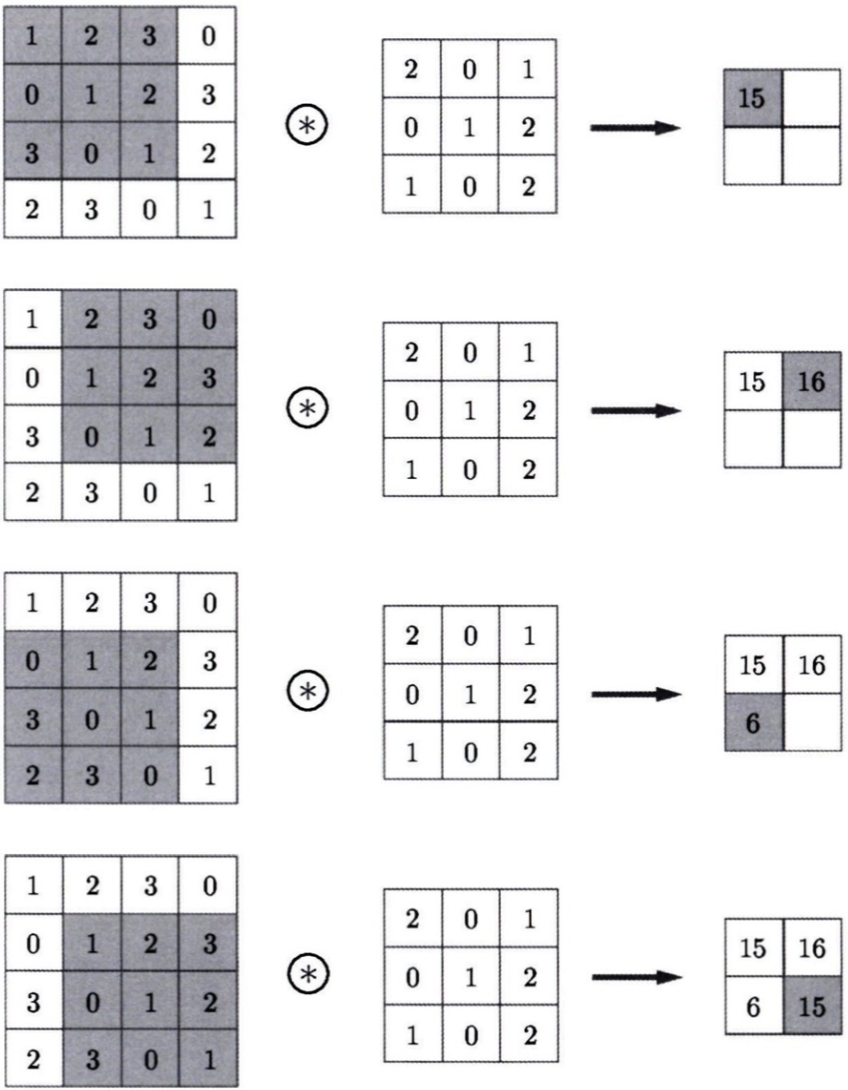  
이후에 각각 원소에 편향(1x1)을 더하면 완성

**패딩**  
합성곱 연산을 수행하기 전에 데이터 주변을 특정값(0)으로 채우기도 함  
위 그림에서 4x4입력데이터에 폭이 1인 패딩을 적용하면  
4x4데이터는 건드리지 않은채로 최외곽에 0으로 이루어진 층(패딩)을 만들어 6x6이 된다  
이러면 필터 적용시 4x4의 결괏값을 얻을 수 있음  
보통 출력 크기를 조정할 목적으로 많이 사용  

**스트라이드**  
필터를 적용하는 위치의 간격을 스트라이드라 부름  
위의 예시에서는 스트라이드가 1  
스트라이드를 키우면 출력값이 작아진다고 해석 가능  

**수식**  
입력의 크기 : $(H,W)$  
필터의 크기 : $(FH,FW)$  
출력의 크기 : $(OH,OW)$  
패딩 : $P$  
스트라이드 : $S$  
$$ \begin{cases}
OH = \frac{H + 2P - FH}{S} + 1 \\
OW = \frac{W + 2P - FW}{S} + 1
\end{cases} $$  
예를 들어 입력이 (28,31)이고 패딩이 2, 스트라이드가 3, 필터가 (5,5)라하면  
OH = 10  
OW = 11  

가능하면 정수로 딱 떨어지는 것을 지향  

**3차원 데이터의 합성곱 연산**  
특징맵이 여러개 있다면 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고 그 결과를 더해서 하나의 출력을 얻음  
주의할 점 : 입력 데이터의 채널 수와 필터의 채널 수가 같아야함  

**블록으로 생각하기**  
3차원 합성곱 연산은 데이터와 필터를 직육면체 블록이라고 가정하면 이해가 쉬움  
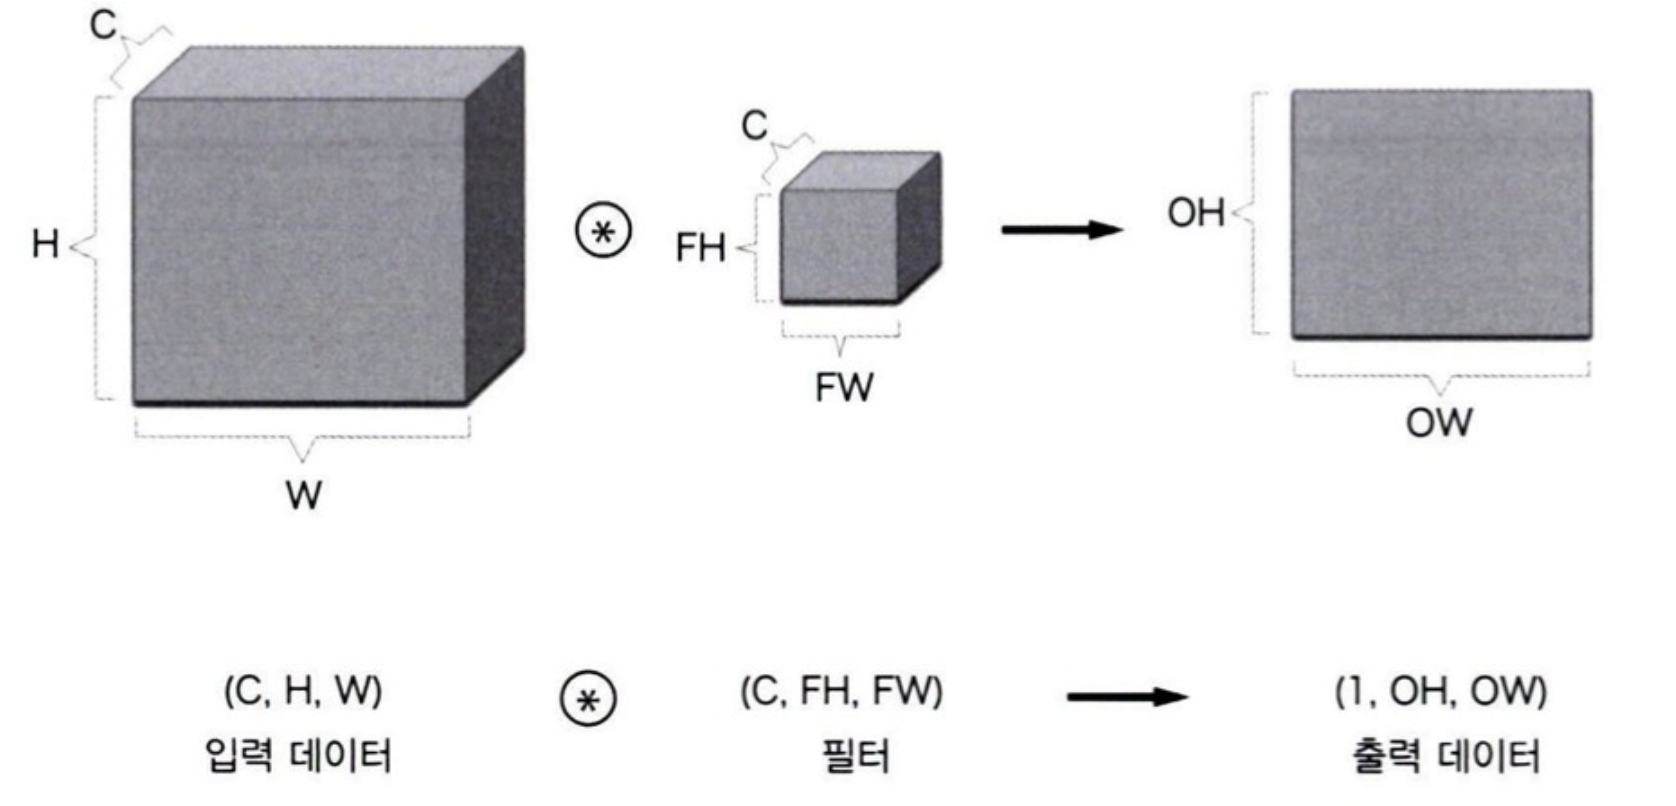  
(채널, 높이, 너비)를 가짐  

만약 출력의 채널 수를 늘리고 싶다면 필터를 다수 사용하면 됨  
이러면 필터는 4차원 데이터가 되고 출력을 3차원으로 만듦  
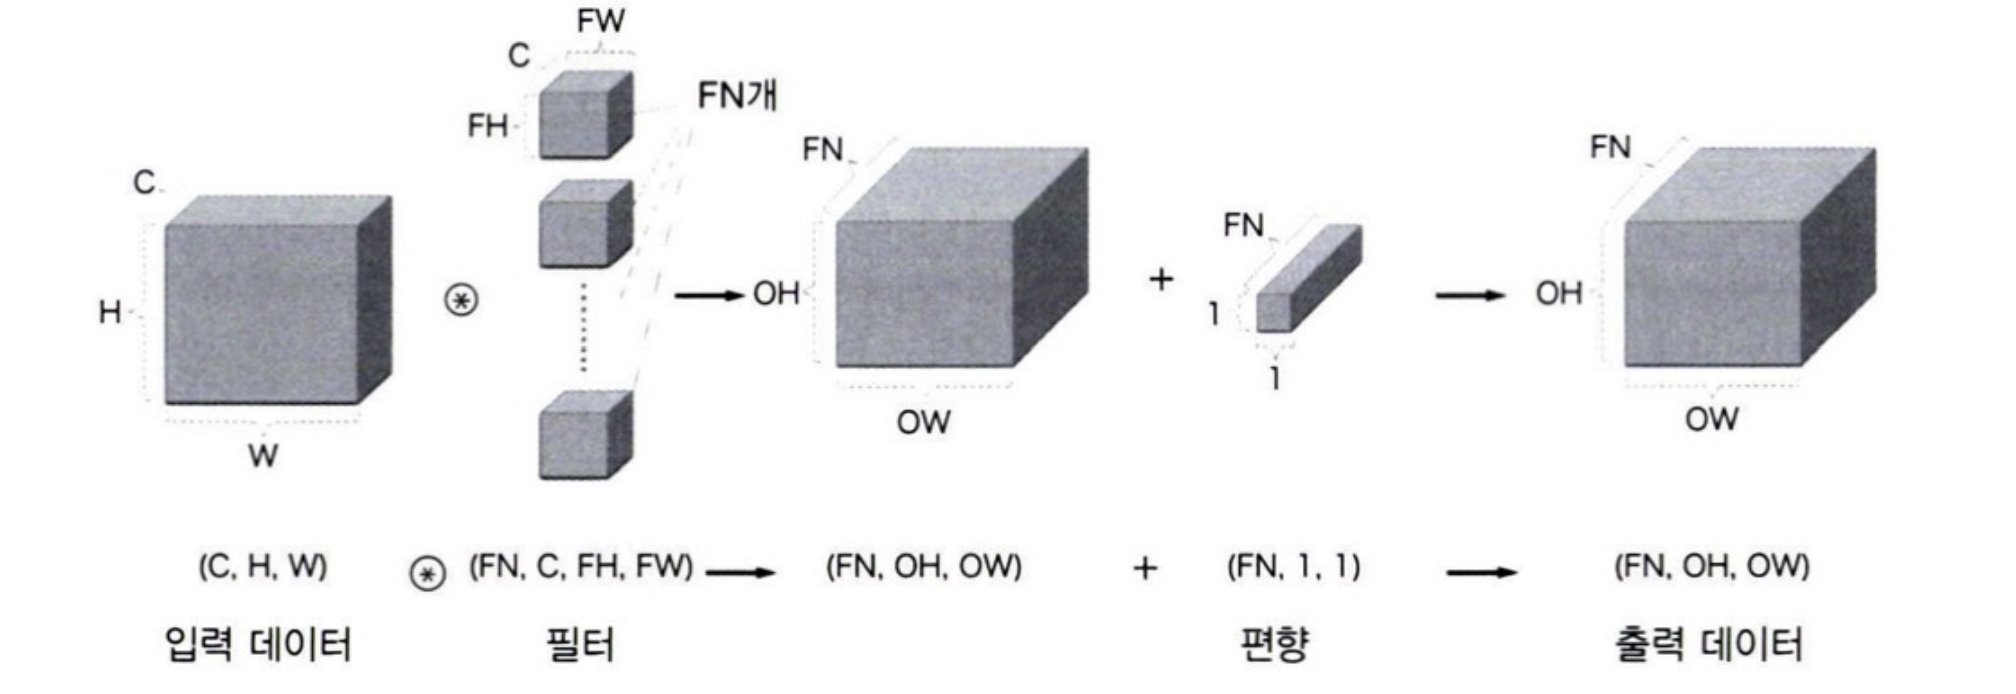

**배치처리**  
위 방향성에서 한 단계 더 나아가 입력 데이터를 N개로 늘린다고하면  
모든 계층과 데이터가 4차원으로 확장되며 논리를 그대로 사용할 수 있다

**풀링계층**  
풀링은 세로/가로 방향의 공간을 줄이는 연산  
영역을 설정해 해당 영역을